<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Valeria Ladrón de Guevara Vidrio y Martha Mariela López Molina.

**Fecha:** 24 de junio del 2021.

**Expediente** : if714513 y if721862.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/valerialadron/Proyecto_VLadron_MMLopez

# Proyecto TEMA-2


<img src="covid.jpg">


___
## 1. Entregable.


### 1.1 COVID-19
> En este proyecto se busca simular el comportamiento de Covid-19 en Estados Unidos a partir de la implementación de las vacunas.

### 1.2 Objetivos.

> #### 1.1 Objetivo general.
> Simular el comportamiento del COVID-19 utilizando los datos de Estados Unidos , para observar el impacto que ha tenido la aplicación de la vacuna.
> #### 1.2 Objetivos específicos
1. Se comparará año 2020 y 2021 para observar impacto de vacunas estimando: 
* Número de muertes 
* Número de casos
* Total de personas hospitalizadas



### 1.3 Definición del problema.
> La COVID-19 es la enfermedad causada por el nuevo coronavirus conocido como SARS-CoV-2. La OMS tuvo noticia por primera vez de la existencia de este nuevo virus el 31 de diciembre de 2019, al ser informada de un grupo de casos de «neumonía vírica» que se habían declarado en Wuhan (República Popular China). La única solución a esta enfermedad sería la creación de una nueva vacuna.

> Para 18 de febrero de este año, había al menos siete vacunas distintas que los países empezaron a administrar, dando  prioridad a las personas vulnerables.
Además de que había más de 200 vacunas experimentales en desarrollo, de las cuales más de 60 estaban en fase clínica. 

> La OMS ha recalcado que estar vacunados no significa tirar por la borda las medidas preventivas y arriesgar nuestra salud y la de los demás, sobre todo porque todavía desconocemos el grado en que las vacunas protegen no solo contra la enfermedad sino también contra la infección y la transmisión.

> De igual manera, ha comentado que la mayoría de los científicos prevén que las vacunas que se desarrollen contra la COVID-19 no tendrán una eficacia del 100%. Pero se trabaja para asegurar que toda vacuna aprobada tenga la máxima eficacia posible, de modo que consiga el mayor efecto en la pandemia.

> Es por eso que nos preguntamos "¿Qué impacto han tenido las vacunas hasta el día de hoy? ¿Qué efectividad han tenido?", siendo esas preguntas las bases del desarrollo de este proyecto.

### 1.4 Nodos y variables que se decidieron simular y porqué
* Número de muertes por dia 
* Personas vacunadas por dia
* Personas hospitalizadas por dia
* Total de casos por dia

### 1.5 Definición de hipótesis y supuestos.
**Hipótesis**

* Entre más vacunas aplicadas existan, menor serán total de muertes.
* EUA tendrá menor cantidad de casos por día por las vacunas aplicadas.

**Supuestos**
 
* En los próximos días la probabilidad de distribución de los datos va a estar en función de los datos anteriores.




### 1.6 Obtención de bases de datos
https://ourworldindata.org/coronavirus





<img src="diagrama.jpg">

In [1]:
#Paqueterias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import KernelDensity
from scipy.stats import loglaplace 
from scipy.stats.distributions import norm
from sklearn.model_selection import GridSearchCV
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
import statsmodels.api as sm 
import matplotlib
from collections import defaultdict
from time import time
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from IPython.display import Markdown as md
from scipy.stats import dweibull
from scipy import optimize
from scipy.stats import exponweib
from scipy.stats import logistic
from scipy.stats import dgamma
from scipy.stats import triang
from scipy.stats import laplace
%matplotlib inline
import os
import scipy.stats as st
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importando datos
covid = pd.read_csv('covid.csv', encoding="utf-8")
data = covid[covid['location'] == 'United States']
data = data.set_index(['date'])
data.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
22/01/2020,USA,North America,United States,1.0,NaN,NaN,0.0,NaN,NaN,0.003,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
23/01/2020,USA,North America,United States,1.0,0.0,NaN,0.0,NaN,NaN,0.003,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
24/01/2020,USA,North America,United States,2.0,1.0,NaN,0.0,NaN,NaN,0.006,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
25/01/2020,USA,North America,United States,2.0,0.0,NaN,0.0,NaN,NaN,0.006,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
26/01/2020,USA,North America,United States,5.0,3.0,NaN,0.0,NaN,NaN,0.015,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75


In [3]:
def log_int(data:'Datos a trabajar en DataFrame'):
    '''
    Esta función nos convierte los datos de una DataFrame en un array, además
    de que les aplica logaritmos para eliminar el sesgo.
    '''
    datos = np.sort(np.log(np.array([int(data.iloc[i,0]) for i in range(len(data))])))
    return datos

In [4]:
def kde_statsmodels_m(x, x_grid, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  
                          var_type='c', **kwargs)
    return lambda x: kde.pdf([x]) 

In [5]:
def kde_statsmodels_u(x, x_grid, bandwidth, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return lambda x: kde.evaluate(x)

In [6]:
def kde_hist_f(datos:'Datos',
              J1:'Bins histograma',
              x:'Linspace'):
    '''
    Esta función nos regresa la función f obtenida por medio del KDE de Statsmodels multivariable 
    para ciertos datos. Además, permite ver el histograma de los datos junto con la función f encontrada
    en una misma gráfica.
    '''
    
    xx = x
    f = kde_statsmodels_m(datos, xx)
    
    plt.hist(datos, bins = J1, density = True)
    plt.plot(xx, f(xx), label = 'Función f')
    plt.legend(loc = 'best')
    plt.show()
    
    return f

In [7]:
def kde_hist_f_u(datos:'Datos',
                bandwidth:'Bandwidth',
                J1:'Bins histograma',
                x:'Linspace'):
    '''
    Esta función nos regresa la función f obtenida por medio del KDE de Statsmodels multivariable 
    para ciertos datos. Además, permite ver el histograma de los datos junto con la función f encontrada
    en una misma gráfica.
    '''
    
    xx = x
    f = kde_statsmodels_u(datos, x, bandwidth)
    
    plt.hist(datos, bins = J1, density = True)
    plt.plot(xx, f(xx), label = 'Función f')
    plt.legend(loc = 'best')
    plt.show()
    
    return f

In [8]:
def get_bandwidth(x:'Datos', 
                 a:'Rango Inferior',
                 b:'Rango Superior',
                 div:'División del rango'):
    grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(a, b, div)},
                    cv=50) 

    grid.fit(x[:, None])
    return grid.best_params_

In [9]:
def Acep_rechazo_reducc_var(N:'número de aleatorias a generar (aproximado)',
                 a:'rango inferior',
                 b:'rango superior',
                 f:'función objetivo a generar',
                 t:'función que mayora a f',
                 metodo:'función del método de reducción que se usará para generar variables aleatorias que evaluará el método de aceptación rechazo',
                 vav:'número de variables aleatorias a las que se le aplicará el método elegido'):

    '''
    Esta función nos regresa N variables aleatorias de la distribución f dada usando el método de 
    aceptación y rechazo. Además, se aplica el método reducción de varianza elegido en los parámetros
    al momento de generar las variables aleatorias R2. Se generarán variables aleatorias con reducción 
    de varianza las veces que sea necesario hasta llegar a los N valores especificados. 
    '''
    puntos_aceptados = 0
    j = 0
    x = np.zeros(N)
    while puntos_aceptados < N:
        if j == 0:
            R2_a = metodo(vav) # Si j es 0, genera nuevas aleatorias con el método elegido.
        R2 = R2_a[j]           # Esta aleatorias con reducción de varianza se evalúan con aceptación rechazo.
        R1 = np.random.uniform(a, b)
        f_x = f(R1) 
        t_x = t(R1)
        condition = R2 * t_x <= f_x
        [plt.plot(R1,R2*t_x,'ob') if condition else plt.plot(R1,R2*t_x,'o')]           
        if condition:
            x[puntos_aceptados] = R1
            puntos_aceptados += 1
        else:
            None
        j += 1
        if j == vav - 1: # Si aún no se llega a la N deseada, j se hace 0 y se vuelven a generar aleatorias con reducción de varianza.
            j = 0        # Es decir, puede que con 1 set de v.a. con reducción se llegue a N o no, si no se llega, se genera otro set de v.a. con reducción.
    plt.show()
    
    return x

In [10]:
def generar_aleatorias_reducc_var(va:'Aleatorias a generar',
                               f:'Función de distribución',
                               v:'Valor máximo (aproximado) de la distribución',
                               xx:'Valores de x a evaluar (linspace)',
                               datos:'Datos sobre los cuales se generarán las aleatorias',
                               metodo:'función que genera aleatorias con el método de reducción de varianza deseado',
                               varv:'# de variables aleatorias a las que se le aplicará el método de reducción de varianza'):
    '''
    Esta función nos genera variables aleatorias con varianza reducida, especificando
    el método de reducción de varianza a aplicar en los argumentos de la función, de una 
    distribución f dada aplicando el método de aceptación y rechazo. Se usa una constante
    como función que mayora a f.
    '''
    
    max_f = f(optimize.fmin(lambda x: -f(x), v, disp=False))
    
    t = lambda x: max_f  # Graficar la constante
    t_2 = lambda x: max_f * np.ones([len(x)])
    
    # Gráficas de las funciones
    plt.plot(xx,f(xx),label='t(x)') # Función f
    plt.plot(xx,t_2(xx),label='t(x)') # Constante
    plt.legend(loc = 'best')
    
    aleat = Acep_rechazo_reducc_var(va, np.amin(datos), np.amax(datos), f, t, metodo, varv)
    
    return aleat

In [11]:
def estra_igualmente_espaciado(B:'Número de estratos'):
    """
    Esta función genera variables aleatorias estratificadas de igual manera (con el mismo espacio).
    """
    U2 = np.random.rand(B)
    i = np.arange(0, B)
    v = (U2 + i) / B # Estratificar
    return v

In [12]:
def int_conf(confianza:'Confianza',
            datos:'Datos a sacar el intervalo'):
    '''
    Esta función nos regresa el intervalo de confianza y la media real de ciertos datos.
    '''
    
    i_price = st.t.interval(confianza, len(datos)-1, loc=np.mean(datos), scale=st.sem(datos))

    return i_price, np.mean(datos)

In [13]:
def graficas_qq(datos:'Datos',
               best:'Array 5 menores errores'):
    '''
    Esta función nos muestra las gráficas Q-Q de las 5 distribuciones elegidas.
    '''
    
    fig, ax = plt.subplots(5, 1, figsize = [10 , 20])
    fig.tight_layout(pad=3.0)

    grap_1 = sm.qqplot(datos, dist=getattr(st, best[0]), line='q', fit=True, ax=ax[0])
    ax[0].grid()
    ax[0].set_title(best[0])

    grap_2 = sm.qqplot(datos, dist=getattr(st, best[1]), line='q', fit=True, ax=ax[1])
    ax[1].grid()
    ax[1].set_title(best[1])

    grap_3 = sm.qqplot(datos, dist=getattr(st, best[2]), line='q', fit=True, ax=ax[2])
    ax[2].grid()
    ax[2].set_title(best[2])

    grap_4 = sm.qqplot(datos, dist=getattr(st, best[3]), line='q', fit=True, ax=ax[3])
    ax[3].grid()
    ax[3].set_title(best[3])

    grap_5 = sm.qqplot(datos, dist=getattr(st, best[4]), line='q', fit=True, ax=ax[4])
    ax[4].grid()
    ax[4].set_title(best[4])

    plt.show()

In [14]:
def chi_cuadrada(best:'Nombre distribución',
                datos:'Datos',
                x:'x del histograma',
                y:'y del histograma',
                J1:'Bins del histograma',
                conf:'Confianza'):
    '''
    Esta función realiza la prueba de chi cuadrada de una distribución dada
    con respecto a ciertos datos y con cierta confianza.
    '''
        
    param = getattr(st, best).fit(datos)
    pi = getattr(st, best).pdf(x, *param)
    
    Ei = x*pi

    x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
    print('Valor de chi cuadrado teorico  = ', x2)

    X2 = st.chisquare(y, Ei)
    print('Valor de chi cuadrado librería = ', X2)

    p = len(param) 
    m = J1-p-1 
    
    Chi_est = st.chi2.ppf(q=conf, df=m)
    print('Estadístico de chi_cuadrado = ', Chi_est)
    
    print('La distribución analizada fue: ', best)

### Número de casos (Nodo1)

Text(0.5, 1.0, 'Casos EUA 2020-2021')

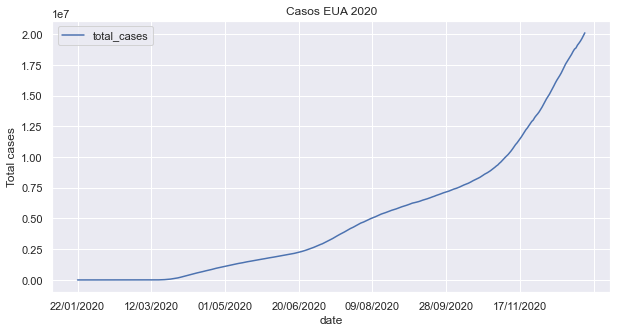

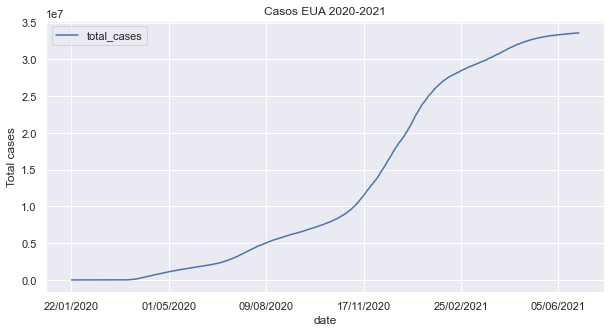

In [15]:
usa_casos = pd.DataFrame(data['total_cases'])
usa_casos_antes = usa_casos.loc['22/01/2020':'31/12/2020']

#2020
usa_casos_antes.plot(figsize=[10,5])
plt.ylabel('Total cases')
plt.title('Casos EUA 2020')
#2020-2021
usa_casos.plot(figsize=[10,5])
plt.ylabel('Total cases')
plt.title('Casos EUA 2020-2021')

### **Distribuciones de probabilidad**

,Distribución,Error
0,laplace,0.004026
1,dweibull,0.002060
2,dgamma,0.002442
3,genlogistic,0.002519
4,loggamma,0.001932
5,cauchy,0.002523
6,mielke,0.002842
7,exponweib,0.002901


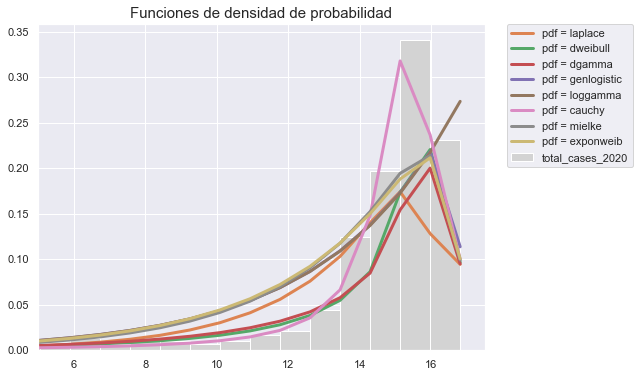

In [16]:
#CASOS 2020
v1_data = log_int(usa_casos_antes)
dist_to = ['laplace','dweibull','dgamma','genlogistic','loggamma','cauchy','mielke','exponweib']
error = []

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Funciones de densidad de probabilidad',size=15)
ax.set_xlim(5, 17.5)
[y, x, _] = ax.hist(v1_data, bins=20, density=True, label='total_cases_2020',fc='lightgray')
x = x[1:]

for dist in dist_to:
    param = getattr(st,dist).fit(v1_data)
    
    pdf = getattr(st, dist).pdf(x, *param)
    
    ax.plot(x,pdf,linewidth=3,label='pdf = '+ str(dist))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
    
    error.append(((y-pdf)**2).mean())

dca=pd.DataFrame(list(zip(dist_to,error)), columns=['Distribución','Error'])
    
dca

In [17]:
#La que mejor se ajusta 2020
best = dca.sort_values(by = 'Error')
best1 = best['Distribución']
best1


4       loggamma
1       dweibull
2         dgamma
3    genlogistic
5         cauchy
6         mielke
7      exponweib
0        laplace
Name: Distribución, dtype: object

> Observamos que las tres distribuciones de menor error son:
1. loggamma
2. genlogistic
3. dweibull

,Distribución,Error
0,argus,0.003453
1,genlogistic,0.002009
2,exponweib,0.005537
3,gompertz,0.006014
4,loggamma,0.001415
5,loglaplace,0.006465
6,gumbel_l,0.006003
7,t,0.005355


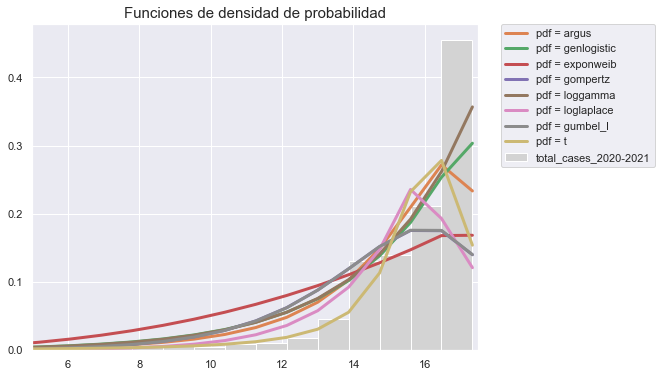

In [18]:
#CASOS 2020-2021
v2_data = log_int(usa_casos)
dist_to = ['argus','genlogistic','exponweib','gompertz','loggamma','loglaplace','gumbel_l','t']
error = []

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Funciones de densidad de probabilidad',size=15)
ax.set_xlim(5, 17.5)
[y, x, _] = ax.hist(v2_data, bins=20, density=True, label='total_cases_2020-2021',fc='lightgray')
x = x[1:]

for dist in dist_to:
    param = getattr(st,dist).fit(v2_data)
    
    pdf = getattr(st, dist).pdf(x, *param)
    
    ax.plot(x,pdf,linewidth=3,label='pdf = '+ str(dist))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
    
    error.append(((y-pdf)**2).mean())

dc=pd.DataFrame(list(zip(dist_to,error)), columns=['Distribución','Error'])
    
dc

In [19]:
#La que mejor se ajusta 2020-2021
best_A = dc.sort_values(by = 'Error')
best2 = best_A['Distribución']
best2

4       loggamma
1    genlogistic
0          argus
7              t
2      exponweib
6       gumbel_l
3       gompertz
5     loglaplace
Name: Distribución, dtype: object

> Observamos que las tres distribuciones de menor error son:
   1. genlogistic
   2. loggamma
   3. argus

### **Ajuste de distribuciones**
###  **Q-Q**

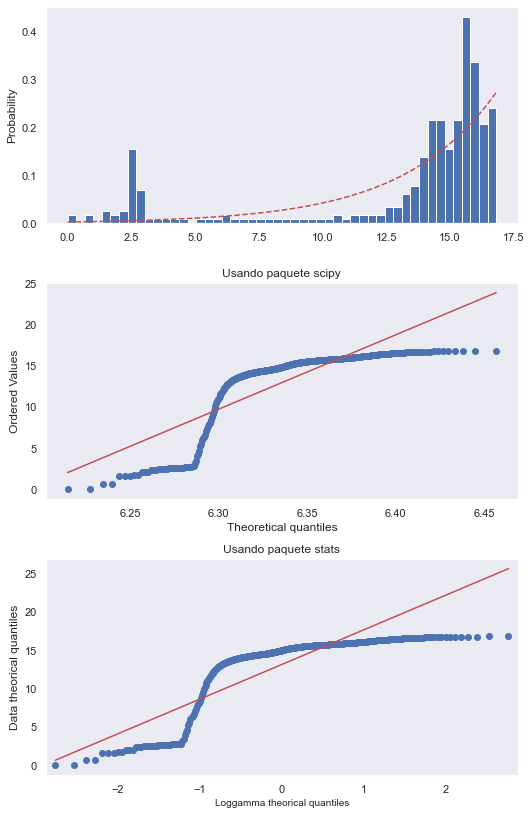

In [20]:
##2020
## loggamma ##


measurements = v1_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,12))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'loggamma'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=10)
plt.ylabel('Data theorical quantiles')
plt.show()

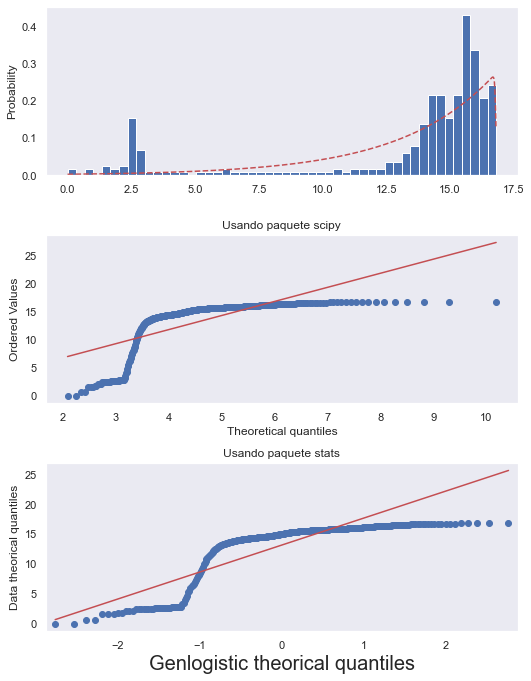

In [21]:
##2020

## genlogistic ##
measurements = v1_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'genlogistic'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

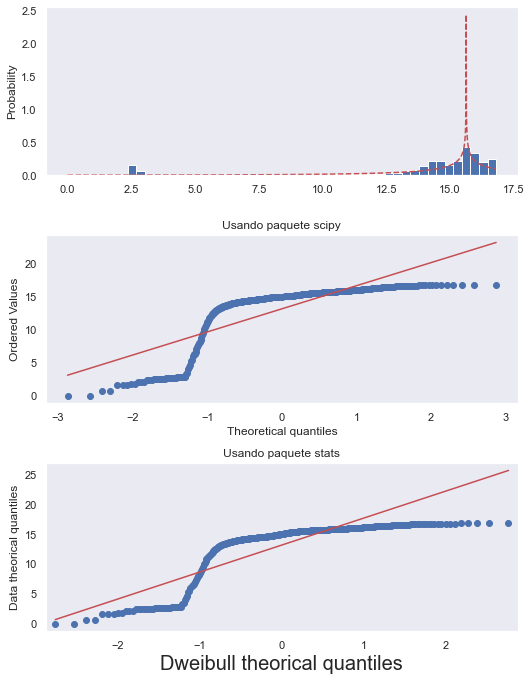

In [22]:
##2020

##dweibull
measurements = v1_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'dweibull'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

> Obervando las gráficas, ninguna se ajusta adecuadamente sin embargo la más cercana sería loggamma para los casos del 2020.

**2020-2021**

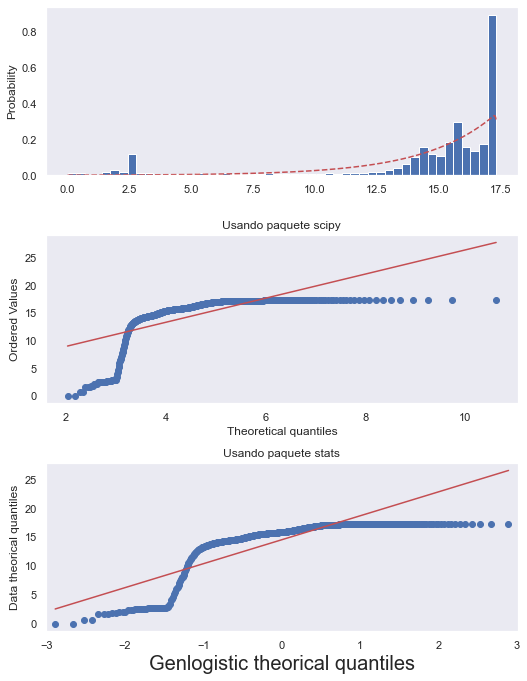

In [23]:
##2020-2021
measurements = v2_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'genlogistic'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

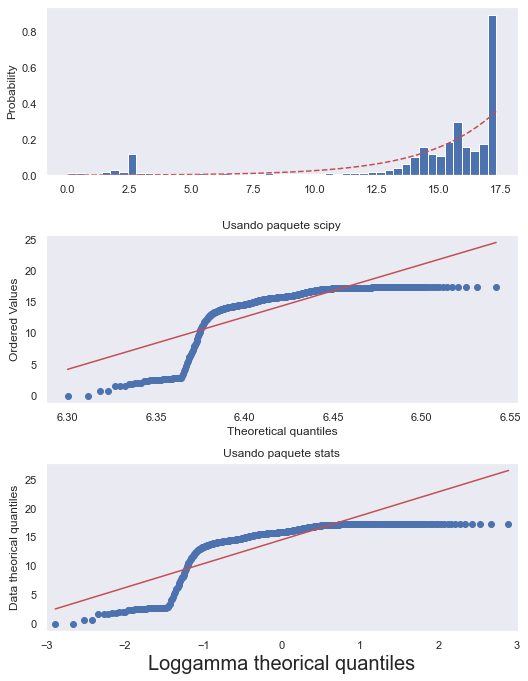

In [24]:
##2020-2021
measurements = v2_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'loggamma'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

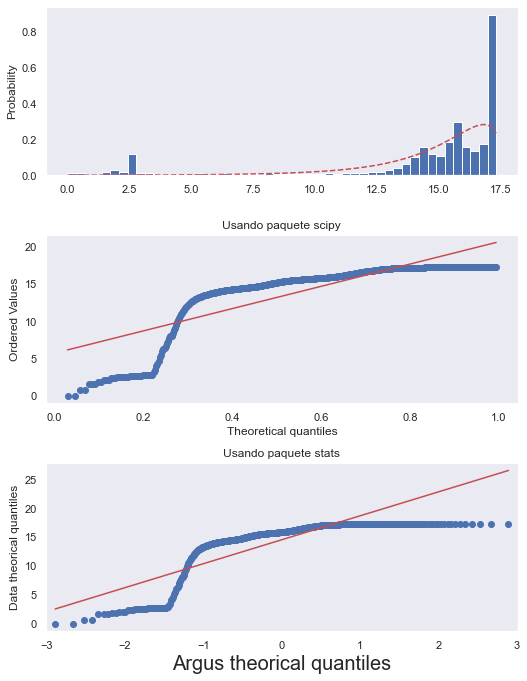

In [25]:
##2020-2021
measurements = v2_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'argus'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

> De igual manera para los casos de 2020-2021 la de menor error fue genlogistic.

### **Histogramas con CHI cuadrada**

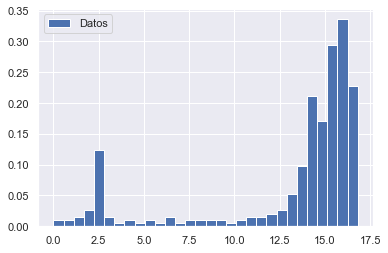

In [26]:
#2020
J1 = 30
y, x, _ = plt.hist(v1_data, bins = J1, density = True, label = 'Datos')
x = x[1:]
plt.legend(loc = 'best')

In [27]:
#2020
chi_cuadrada(best1[4],v1_data,x,y,J1,0.95)

Valor de chi cuadrado teorico  =  23.58093591649802
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=23.58093591649802, pvalue=0.7493125256039821)
Estadístico de chi_cuadrado =  38.885138659830055
La distribución analizada fue:  loggamma


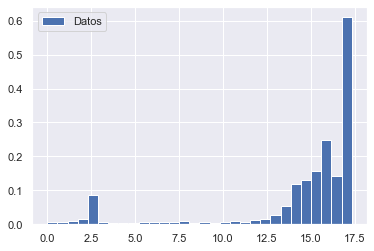

In [28]:
#2020-2021
J2 = 30
y, x, _ = plt.hist(v2_data, bins = J1, density = True, label = 'Datos')
x = x[1:]
plt.legend(loc = 'best')

In [29]:
##2020-2021
chi_cuadrada(best2[1],v2_data,x,y,J1,0.95)

Valor de chi cuadrado teorico  =  25.074847043295303
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=25.074847043295303, pvalue=0.6743577140911893)
Estadístico de chi_cuadrado =  38.885138659830055
La distribución analizada fue:  genlogistic


### **KDE**

In [30]:
#bandwith adecuado 2020
bd1 = get_bandwidth(v1_data, .1, 2, 30).pop('bandwidth')
bd1

0.8206896551724137

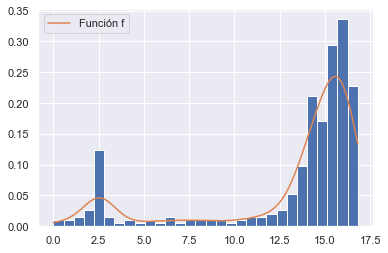

In [31]:
#2020
xx = np.linspace(np.amin(v1_data), np.amax(v1_data), 1000)
f1 = kde_hist_f_u(v1_data,bd1, J1, xx)

In [32]:
#bandwith adecuado 2020-2021
bd2 = get_bandwidth(v2_data, .1, 5, 100).pop('bandwidth')
bd2

0.792929292929293

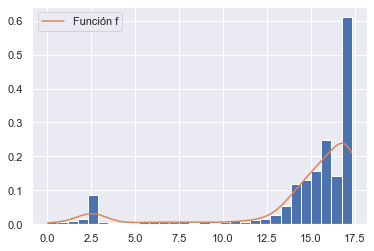

In [33]:
#2020-2021
xx2 = np.linspace(np.amin(v2_data), np.amax(v2_data), 1000)
f2 = kde_hist_f_u(v2_data,bd2, J2, xx2)

### **Aceptación y Rechazo con reducción de varianzas**

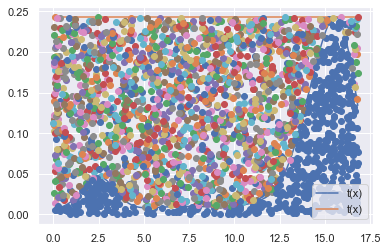

array([ 3.90330014,  9.22425043, 10.23210315,  4.15053934, 16.64989815,
        5.3899203 , 10.73785941, 14.37176549,  7.56700478,  9.68471633,
       13.90250444,  7.72693311, 14.24147064, 15.75398248,  3.02886296,
        3.95665495,  5.44938543,  7.91909541,  8.873915  ,  5.56152071,
       13.3439893 , 12.43711981, 12.82092525, 14.52186741, 11.38187229,
        1.38293319, 14.42905527, 12.75662782, 12.51262238,  3.5959933 ,
        2.91435236,  1.37561447,  2.32090319, 15.3003832 , 13.49169503,
       15.42239547, 13.40262603, 16.68748344, 16.25861552,  2.20989314,
        2.06502777,  3.55121345, 13.80202618, 14.24001188,  2.08005608,
        1.7251895 ,  3.34530584,  2.13901102,  2.84198168, 15.18007155,
       14.02846694,  2.98748344, 14.13360767, 13.42384344, 16.53476404,
        2.34533552, 15.01775987, 14.81706142, 13.52903819, 16.21896583,
       15.53439878, 15.9192957 , 14.74188468, 16.12607648, 16.8074078 ,
       13.91516426, 14.99223438, 14.04931869, 14.43086136, 15.30

In [34]:
#2020
v_a_casos1 = generar_aleatorias_reducc_var(600,f1,16,xx,v1_data,estra_igualmente_espaciado,600)
v_a_casos1

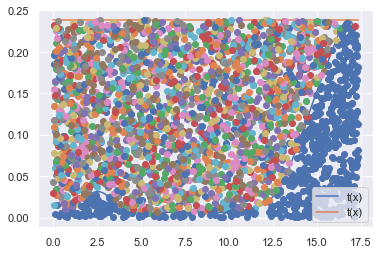

array([14.5509823 , 15.74687281, 17.13098688,  2.71276797,  6.12981698,
        4.07545281,  1.60092561,  1.78353476, 15.82669622,  0.06636095,
        5.84083962,  2.39533052, 16.32607901,  1.71252435, 10.73669469,
       16.0680865 , 14.92067949, 17.27710212, 13.1236708 ,  2.46436732,
        3.15387854, 13.69695247, 14.49309259, 16.69277288,  3.46079385,
        1.77074774, 13.89692271,  2.88534299, 15.22131808, 15.04320884,
        2.46119951,  2.44132393, 13.90010553,  3.2527181 ,  2.16306366,
       16.2445691 , 13.95351157,  2.27449597,  3.13844555, 15.32451122,
       15.953473  , 14.21630055, 15.39381771, 15.72119431, 16.12368453,
       14.35174998, 14.73556276, 14.19094164, 15.87412638, 14.61102954,
       16.36338421, 14.02063429, 16.85344661, 13.60588492, 15.38175882,
       16.6370497 , 14.25491214, 17.12804644, 14.75433371, 17.30770111,
       15.923727  , 15.2525005 , 14.26667015, 15.61218623, 16.04598861,
       16.21861142, 16.70961723, 14.29684254, 14.53554534, 16.58

In [35]:
#2020-2021
v_a_casos2 = generar_aleatorias_reducc_var(600,f2,17,xx2,v2_data,estra_igualmente_espaciado,600)
v_a_casos2

### **Montecarlo y Muestreo estratificado**

In [36]:
##2020
params = st.exponweib.fit(v1_data)
# Separate parts of parameters
arg = params[:-2]
loc1 = params[-2]
scale1 = params[-1]

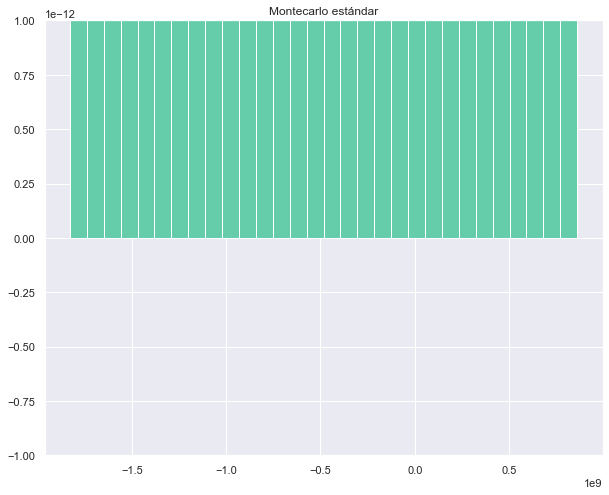

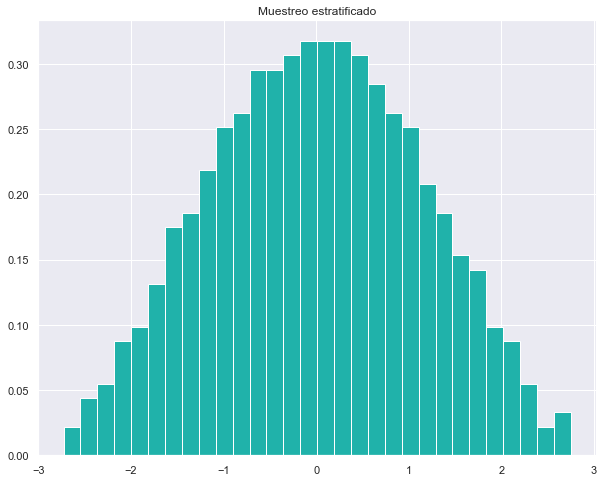

In [37]:
N = 500
# (Método transformada inversa visto en clases pasadas)
# Método montecarlo estándar 
montecarlo_standar = st.cosine.ppf(np.random.rand(N),loc1,scale1)
plt.figure(figsize=(10,8))
plt.hist(montecarlo_standar,30,density=True,color='mediumaquamarine')
plt.title('Montecarlo estándar')
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(B)
i = np.arange(0,B)
v = (U2+i)/B
m_estratificado = st.cosine.ppf(v)

plt.figure(figsize=(10,8))
plt.hist(m_estratificado,30,density=True,color='lightseagreen')
plt.title('Muestreo estratificado')
plt.show()

In [38]:
##2020-2021
param = st.exponweib.fit(v2_data)
# Separate parts of parameters
arg2 = param[:-2]
loc2 = param[-2]
scale2 = param[-1]

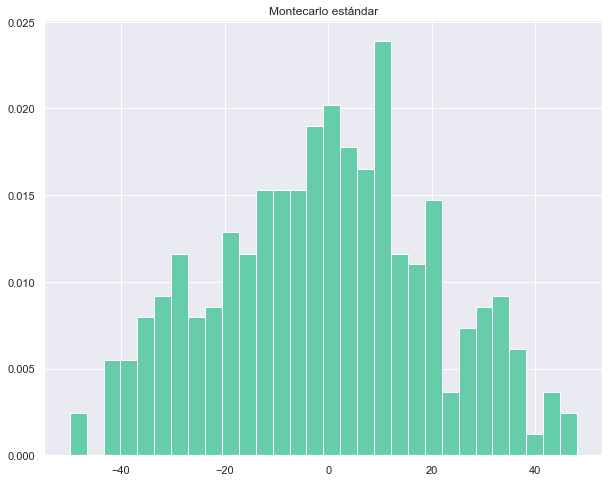

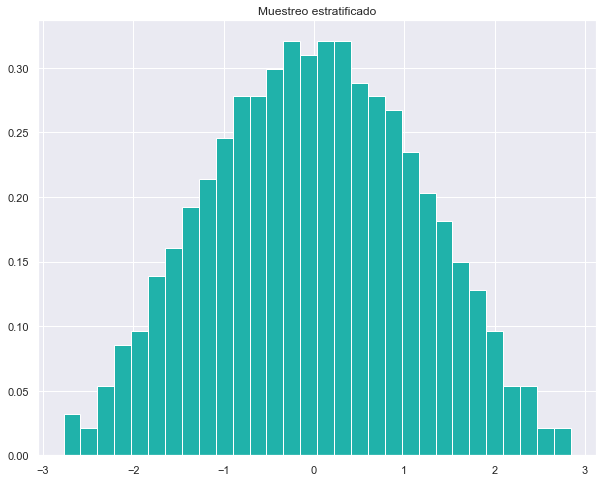

In [39]:
N = 500
# (Método transformada inversa visto en clases pasadas)
# Método montecarlo estándar 
montecarlo_standar = st.cosine.ppf(np.random.rand(N),loc2,scale2)
plt.figure(figsize=(10,8))
plt.hist(montecarlo_standar,30,density=True,color='mediumaquamarine')
plt.title('Montecarlo estándar')
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(B)
i = np.arange(0,B)
v = (U2+i)/B
m_estratificado = st.cosine.ppf(v)

plt.figure(figsize=(10,8))
plt.hist(m_estratificado,30,density=True,color='lightseagreen')
plt.title('Muestreo estratificado')
plt.show()

> De esta manera, se puede observar en ambos casos una distribución más clara.

### Total de muertes (Nodo2)

Text(0.5, 1.0, 'Muertes EUA 2020-2021')

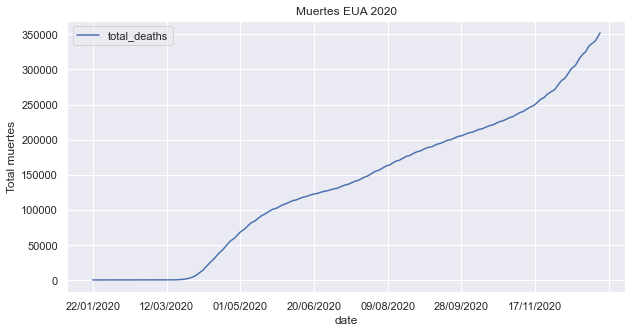

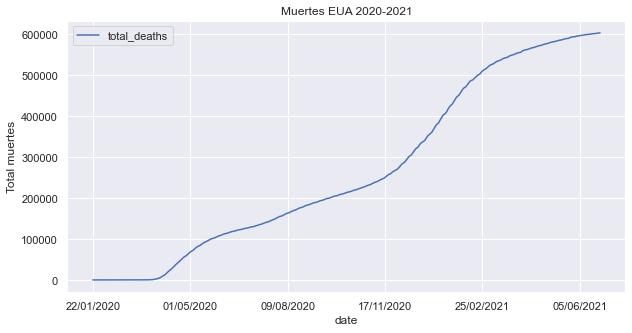

In [40]:
usa_muertes = pd.DataFrame(data['total_deaths'])
usa_muertes_antes = usa_muertes.loc['22/01/2020':'31/12/2020']

#2020
usa_muertes_antes.plot(figsize=[10,5])
plt.ylabel('Total muertes')
plt.title('Muertes EUA 2020')
#2020-2021
usa_muertes.plot(figsize=[10,5])
plt.ylabel('Total muertes')
plt.title('Muertes EUA 2020-2021')


### **Distribuciones de probabilidad**

,Distribución,Error
0,dweibull,0.009336
1,gennorm,0.004510
2,weibull_max,0.009725
3,argus,0.007401
4,loggamma,0.008384
5,cauchy,0.005791
6,dgamma,0.006169
7,burr,0.008302


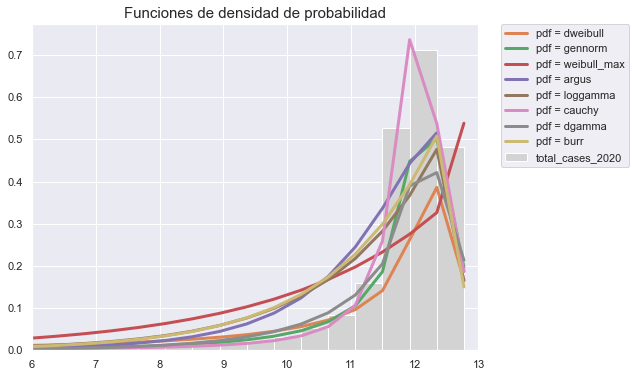

In [41]:
#USA MUERTES 2020
usam_a = usa_muertes_antes[usa_muertes_antes['total_deaths'] !=0]
vma_data = log_int(usam_a)
dist_to = ['dweibull','gennorm','weibull_max','argus','loggamma','cauchy','dgamma','burr']
error = []

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Funciones de densidad de probabilidad',size=15)
ax.set_xlim(6, 13)
[y, x, _] = ax.hist(vma_data, bins=30, density=True, label='total_cases_2020',fc='lightgray')
x = x[1:]

for dist in dist_to:
    param = getattr(st,dist).fit(vma_data)
    
    pdf = getattr(st, dist).pdf(x, *param)
    
    ax.plot(x,pdf,linewidth=3,label='pdf = '+ str(dist))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
    
    error.append(((y-pdf)**2).mean())

dma=pd.DataFrame(list(zip(dist_to,error)), columns=['Distribución','Error'])
    
dma

In [42]:
#La que mejor se ajusta 2020
bestm_a = dma.sort_values(by = 'Error')
best11 = bestm_a['Distribución']
best11

1        gennorm
5         cauchy
6         dgamma
3          argus
7           burr
4       loggamma
0       dweibull
2    weibull_max
Name: Distribución, dtype: object

Las distribuciones con menor error son:
1. gennorm
2. cauchy
3. dgamma

,Distribución,Error
0,johnsonsu,0.008423
1,powerlaw,0.003907
2,argus,0.007874
3,genlogistic,0.005355
4,loggamma,0.003770
5,dweibull,0.013674
6,gumbel_l,0.011012
7,burr,0.008288


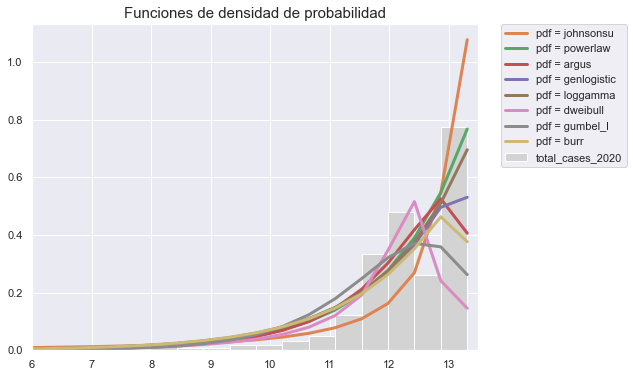

In [43]:
#USA MUERTES 2020-2021
usam = usa_muertes[usa_muertes['total_deaths'] !=0]
vm_data = log_int(usam)
dist_to = ['johnsonsu','powerlaw','argus','genlogistic','loggamma','dweibull','gumbel_l','burr']
error = []

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Funciones de densidad de probabilidad',size=15)
ax.set_xlim(6, 13.5)
[y, x, _] = ax.hist(vm_data, bins=30, density=True, label='total_cases_2020',fc='lightgray')
x = x[1:]

for dist in dist_to:
    param = getattr(st,dist).fit(vm_data)
    
    pdf = getattr(st, dist).pdf(x, *param)
    
    ax.plot(x,pdf,linewidth=3,label='pdf = '+ str(dist))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
    
    error.append(((y-pdf)**2).mean())

dm=pd.DataFrame(list(zip(dist_to,error)), columns=['Distribución','Error'])
    
dm

In [44]:
#La que mejor se ajusta 2020-2021
bestm = dm.sort_values(by = 'Error')
best12 = bestm['Distribución']
best12

4       loggamma
1       powerlaw
3    genlogistic
2          argus
7           burr
0      johnsonsu
6       gumbel_l
5       dweibull
Name: Distribución, dtype: object

Las distribuciones con menor error son:
1. genlogistic
2. loggamma
3. powerlaw

### **Ajuste de distribuciones**
### Q-Q

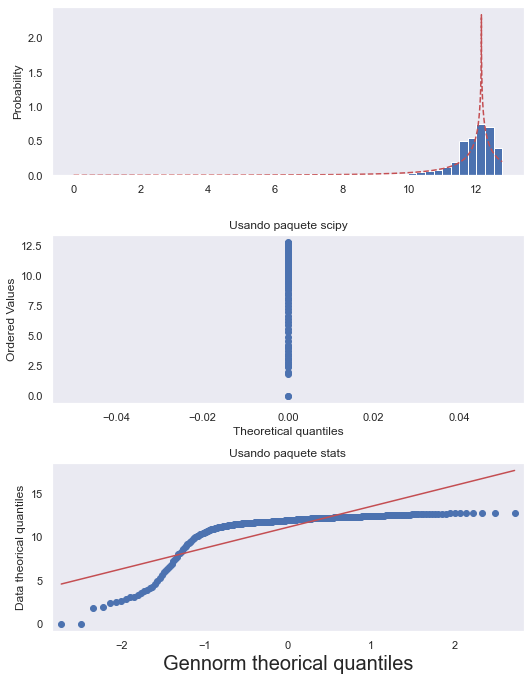

In [45]:
##2020
## gennorm ##


measurements = vma_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'gennorm'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .00001)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

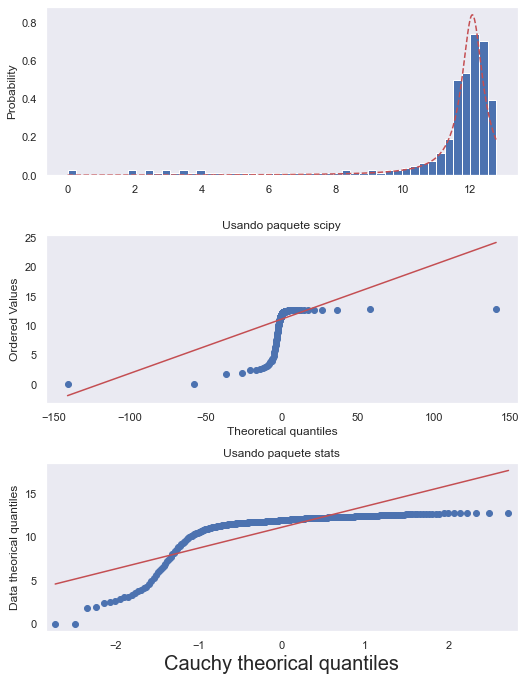

In [46]:
##2020
## cauchy ##


measurements = vma_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'cauchy'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .001)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

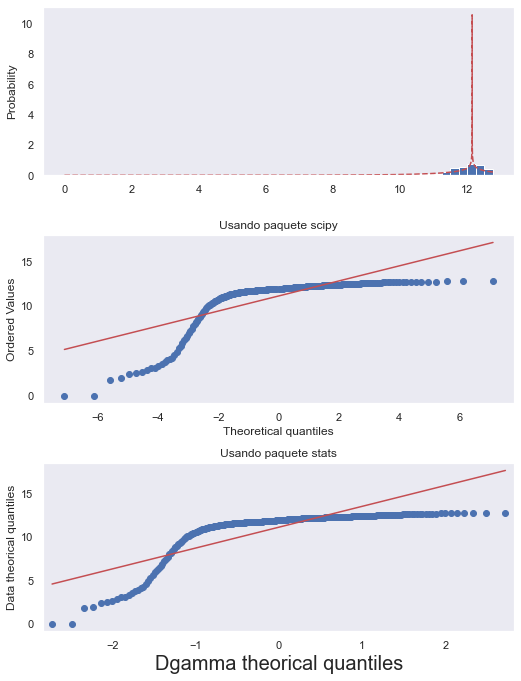

In [47]:
##2020
## dgamma ##


measurements = vma_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'dgamma'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .0001)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

> Obervando de igual manera las gráficas, ninguna se ajusta adecuadamente sin embargo la más cercana sería dgamma para las muertes del 2020.

**2020-2021**

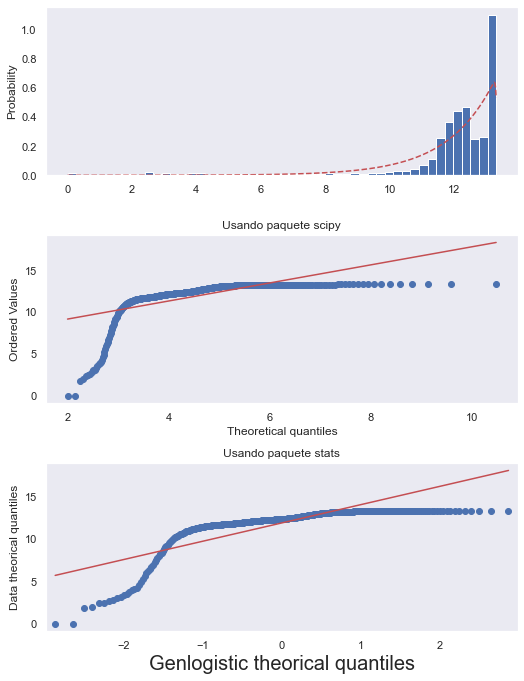

In [48]:
##2020-2021
## genlogistic ##


measurements = vm_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'genlogistic'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .001)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

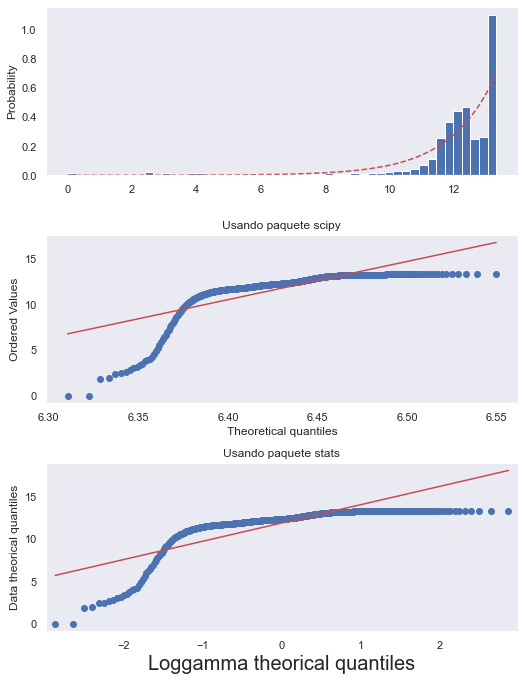

In [49]:
##2020-2021
## logamma ##


measurements = vm_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'loggamma'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .001)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

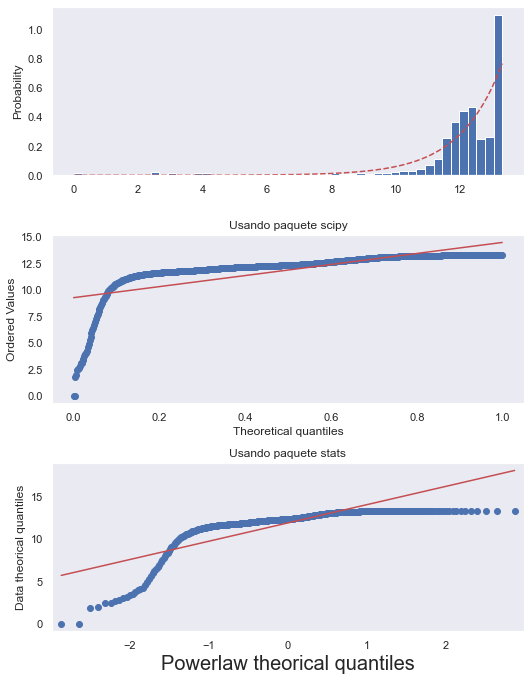

In [50]:
##2020-2021
## powerlaw ##


measurements = vm_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'powerlaw'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .001)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

> Obervando de igual manera las gráficas, ninguna se ajusta adecuadamente sin embargo la más cercana sería genlogistic para las muertes del 2020-2021.

### CHI cuadrada con histogramas


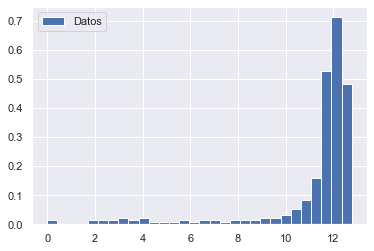

In [51]:
MA = 30
y, x, _ = plt.hist(vma_data, bins = MA, density = True, label = 'Datos')
x = x[1:]
plt.legend(loc = 'best')

In [52]:
#2020 Muertes
chi_cuadrada(best11[1],vma_data,x,y,MA,0.95)

Valor de chi cuadrado teorico  =  16.62139113044723
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=16.62139113044723, pvalue=0.9677392046354131)
Estadístico de chi_cuadrado =  38.885138659830055
La distribución analizada fue:  gennorm


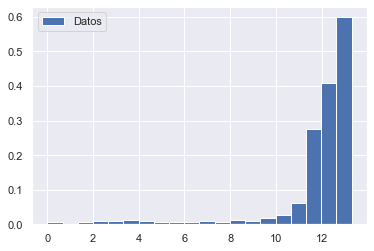

In [53]:
#2020-2021
M = 20
y, x, _ = plt.hist(vm_data, bins = M, density = True, label = 'Datos')
x = x[1:]
plt.legend(loc = 'best')

In [54]:
#2020-2021
chi_cuadrada(best12[3],vm_data,x,y,M,0.95)

Valor de chi cuadrado teorico  =  18.28348024771622
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=18.28348024771622, pvalue=0.5035830838785038)
Estadístico de chi_cuadrado =  26.29622760486423
La distribución analizada fue:  genlogistic


### KDE

In [55]:
#bandwith adecuado 2020
bd3 = get_bandwidth(vma_data, .1, 1, 30).pop('bandwidth')
bd3

0.6275862068965516

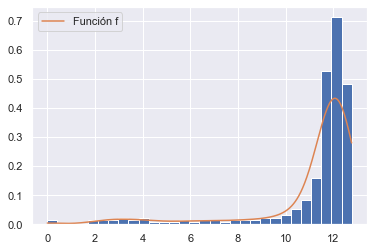

In [56]:
#2020 muertes
xma = np.linspace(np.amin(vma_data), np.amax(vma_data), 1000)
fma = kde_hist_f_u(vma_data,bd3, MA, xma)

In [57]:
#bandwith adecuado 2020-2021
bd4 = get_bandwidth(vm_data, .1, 1, 30).pop('bandwidth')
bd4

0.7206896551724138

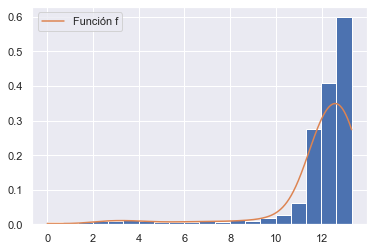

In [58]:
#2020-2021 muertes
xm = np.linspace(np.amin(vm_data), np.amax(vm_data), 1000)
fm = kde_hist_f_u(vm_data,bd4, M, xm)

### **Aceptación y rechazo con reducción de varianzas**

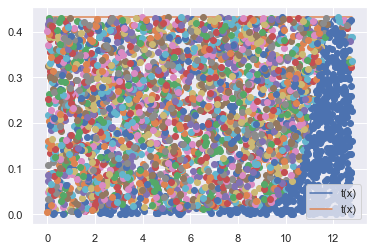

array([10.30795402,  3.24492583,  2.64995587,  3.2808176 ,  4.61777483,
        3.23517153,  5.1462957 , 11.55199151,  7.42750745, 11.12294168,
        4.66789219,  7.62557028, 10.14340581,  3.29845008, 10.79710824,
       12.08612958,  9.97793167, 12.24605689, 12.44475103, 12.70483775,
       10.62037119, 11.01634521, 10.88655271, 10.70211292, 10.61754535,
        9.52852876, 10.3064348 , 11.48546319, 11.239951  , 12.67283156,
       12.03457774, 11.41461765, 11.14948915, 10.16578815, 11.59026727,
       11.93137019, 10.94179811, 11.15380892, 11.15578295, 12.628805  ,
       12.7082434 , 10.49029539, 10.78690395, 11.59450585, 12.10749566,
       10.74747754, 10.77715969, 11.40590324, 10.87329108, 12.15679192,
       12.4061031 , 10.7501512 , 10.91976745, 11.93090099, 12.50652801,
       12.1406838 , 11.53866717, 10.98861394, 12.05333121, 11.96313665,
       11.99001321, 11.21172297, 11.46130009, 11.20956056, 11.37304926,
       12.40250123, 12.68406435, 11.3259733 , 12.06828373, 12.60

In [59]:
#2020
v_a_muertes1 = generar_aleatorias_reducc_var(600,fma,12,xma,vma_data,estra_igualmente_espaciado,600)
v_a_muertes1

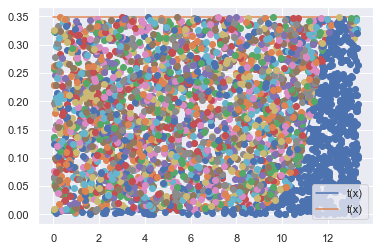

array([10.14078533,  4.36606657, 11.60194183, 11.93718377,  9.78737221,
        8.36506452,  8.3058933 ,  7.76666021,  6.02999999,  9.22487735,
       10.55822805,  3.18024031,  3.72330895, 10.30185314, 11.3001907 ,
        9.54257804, 11.7498589 , 11.94882458, 13.1846938 , 11.30578206,
       11.10307528, 10.26498372, 11.31315699, 11.61678895, 10.00214273,
       10.08334488, 10.87145861, 11.43932751, 11.50974109, 12.24348037,
       11.46528646, 11.0654289 , 10.38684698, 12.66251767, 11.27226636,
       12.52492062, 12.93037765, 11.24285058, 11.4795428 , 12.56291854,
       11.71776334, 13.03099001, 13.05051523, 13.17429838, 11.69204308,
       12.88321412, 12.54136746, 12.84624004, 11.98533094, 12.71278071,
       12.29989626, 11.84353079, 11.97004779, 11.0265156 , 12.36575764,
       12.69498947, 11.82870612, 12.07504751, 12.33607515, 11.33282961,
       11.45490692, 12.22152948, 11.59240981, 11.1874286 , 12.61149498,
       13.23426547, 11.43364089, 13.28795826, 12.51993898, 12.73

In [60]:
#2020-2021
v_a_muertes2 = generar_aleatorias_reducc_var(600,fm,9,xm,vm_data,estra_igualmente_espaciado,600)
v_a_muertes2

### **Montecarlo y muestreo estratificado**


In [61]:
#2020
params = st.dgamma.fit(vma_data)
# Separate parts of parameters
arg3 = params[:-2]
loc3 = params[-2]
scale3 = params[-1]


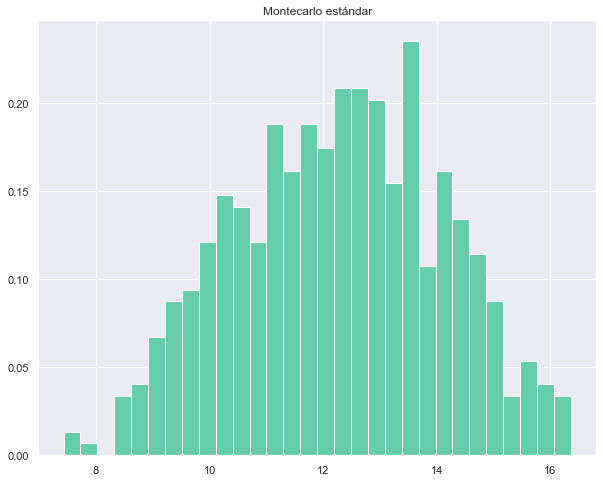

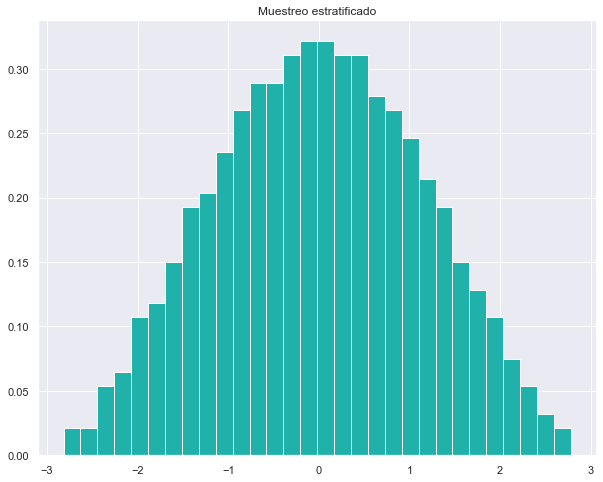

In [62]:
#2020
N = 500
# (Método transformada inversa visto en clases pasadas)
# Método montecarlo estándar 
montecarlo_standar = st.cosine.ppf(np.random.rand(N),loc3,scale3)
plt.figure(figsize=(10,8))
plt.hist(montecarlo_standar,30,density=True,color='mediumaquamarine')
plt.title('Montecarlo estándar')
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(B)
i = np.arange(0,B)
v = (U2+i)/B
m_estratificado = st.cosine.ppf(v)

plt.figure(figsize=(10,8))
plt.hist(m_estratificado,30,density=True,color='lightseagreen')
plt.title('Muestreo estratificado')
plt.show()

In [63]:
#2020-2021
params = st.laplace.fit(vm_data)
# Separate parts of parameters
arg4 = params[:-2]
loc4 = params[-2]
scale4 = params[-1]



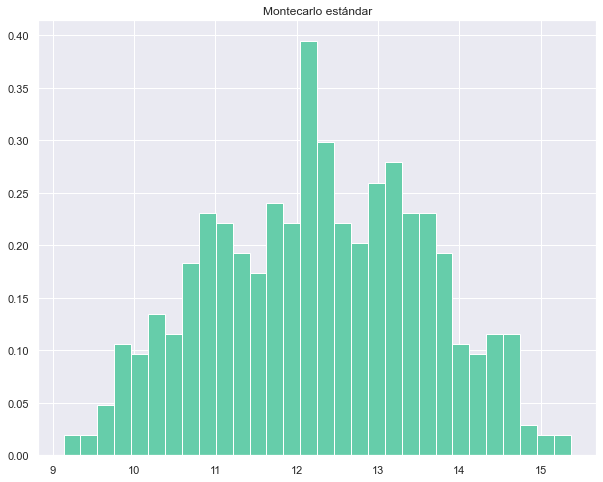

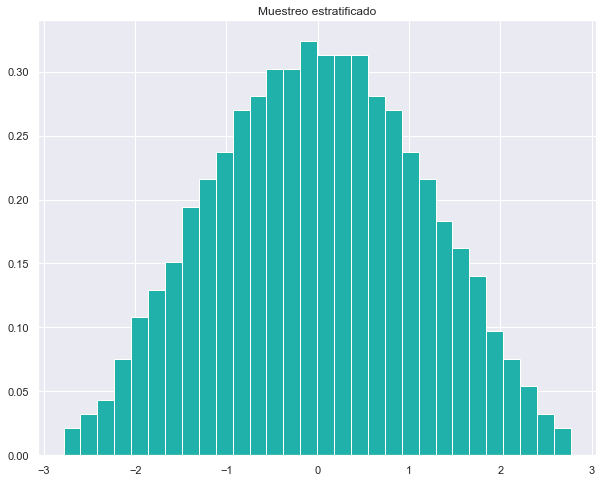

In [64]:
#2020
N = 500
# (Método transformada inversa visto en clases pasadas)
# Método montecarlo estándar 
montecarlo_standar = st.cosine.ppf(np.random.rand(N),loc4,scale4)
plt.figure(figsize=(10,8))
plt.hist(montecarlo_standar,30,density=True,color='mediumaquamarine')
plt.title('Montecarlo estándar')
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(B)
i = np.arange(0,B)
v = (U2+i)/B
m_estratificado = st.cosine.ppf(v)

plt.figure(figsize=(10,8))
plt.hist(m_estratificado,30,density=True,color='lightseagreen')
plt.title('Muestreo estratificado')
plt.show()

> De esta manera, se puede observar en ambos casos una distribución más clara.

### Pacientes hospitalizados

Text(0.5, 1.0, 'Pacientes hospitalizados EUA 2020-2021')

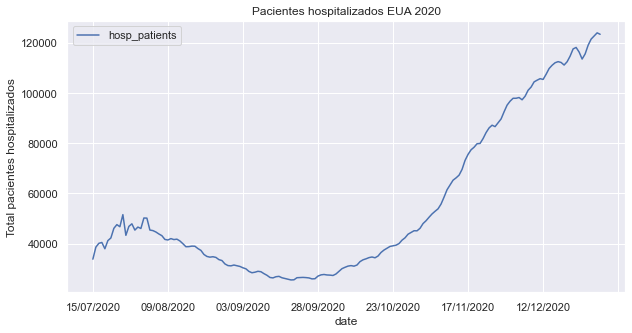

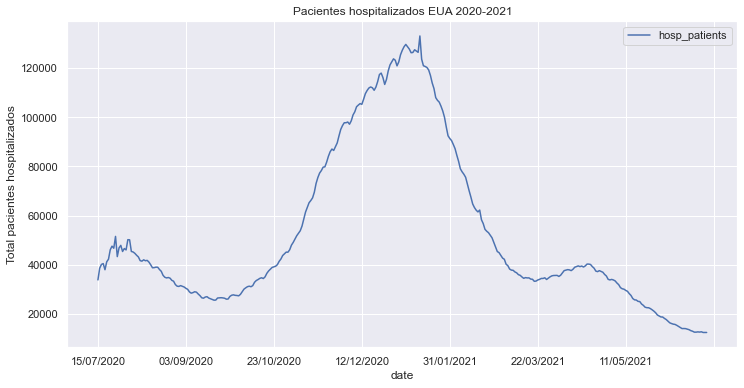

In [90]:
usa_hosp = pd.DataFrame(data['hosp_patients'])
usa_hosp_antes = usa_hosp.loc['22/01/2020':'31/12/2020']

hosp = usa_hosp[usa_hosp['hosp_patients'] !=0]
hosp1 = usa_hosp_antes[usa_hosp_antes['hosp_patients'] != 0 ]

usa_hosp_antes = usa_hosp.loc['22/01/2020':'31/12/2020']

#2020
hosp1.plot(figsize=[10,5])
plt.ylabel('Total pacientes hospitalizados')
plt.title('Pacientes hospitalizados EUA 2020')
#2020-2021
hosp.plot(figsize=[12,6])
plt.ylabel('Total pacientes hospitalizados')
plt.title('Pacientes hospitalizados EUA 2020-2021')

### Distribuciones de probabilidad

,Distribución,Error
0,johnsonsb,0.101017
1,powerlaw,0.125416
2,gengamma,0.123802
3,gengamma,0.123802
4,expon,0.125536
5,bradford,0.125097
6,gausshyper,0.101760
7,genexpon,0.124957
8,nakagami,0.122085


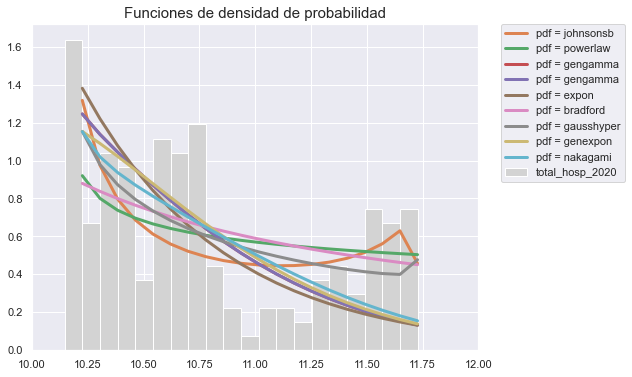

In [66]:
#Hospitalizados 2020
v3_data = log_int(hosp1)
dist_to = ['johnsonsb','powerlaw','gengamma','gengamma','expon','bradford','gausshyper','genexpon','nakagami']
error = []

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Funciones de densidad de probabilidad',size=15)
ax.set_xlim(10, 12)
[y, x, _] = ax.hist(v3_data, bins=20, density=True, label='total_hosp_2020',fc='lightgray')
x = x[1:]

for dist in dist_to:
    param = getattr(st,dist).fit(v3_data)
    
    pdf = getattr(st, dist).pdf(x, *param)
    
    ax.plot(x,pdf,linewidth=3,label='pdf = '+ str(dist))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
    
    error.append(((y-pdf)**2).mean())

dha=pd.DataFrame(list(zip(dist_to,error)), columns=['Distribución','Error'])
    
dha


In [67]:
#La que mejor se ajusta 2020
best_h = dha.sort_values(by = 'Error')
best_h0 = best_h['Distribución']
best_h0

0     johnsonsb
6    gausshyper
8      nakagami
2      gengamma
3      gengamma
7      genexpon
5      bradford
1      powerlaw
4         expon
Name: Distribución, dtype: object

> Observamos que las tres distribuciones de menor error son:
1. johnsonsb
2. gausshyper
3. nakagami

,Distribución,Error
0,laplace,0.048776
1,burr12,0.063672
2,dgamma,0.046389
3,foldcauchy,0.044906
4,cauchy,0.045725
5,loglaplace,0.048146
6,burr,0.067190
7,dweibull,0.047755


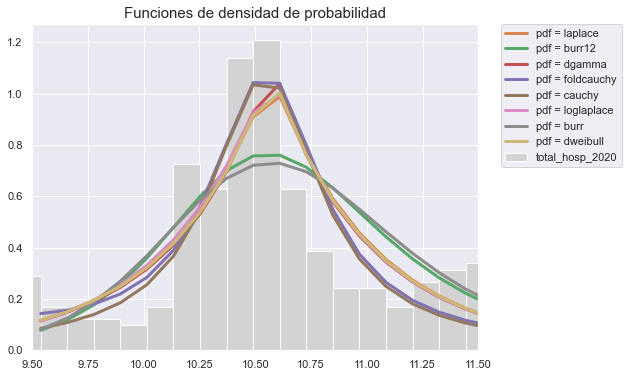

In [68]:
#Hospitalizados 2020-2021
v4_data = log_int(hosp)
dist_to = ['laplace','burr12','dgamma','foldcauchy','cauchy','loglaplace','burr','dweibull']
error = []

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Funciones de densidad de probabilidad',size=15)
ax.set_xlim(9.5, 11.5)
[y, x, _] = ax.hist(v4_data, bins=20, density=True, label='total_hosp_2020',fc='lightgray')
x = x[1:]

for dist in dist_to:
    param = getattr(st,dist).fit(v4_data)
    
    pdf = getattr(st, dist).pdf(x, *param)
    
    ax.plot(x,pdf,linewidth=3,label='pdf = '+ str(dist))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
    
    error.append(((y-pdf)**2).mean())

dh=pd.DataFrame(list(zip(dist_to,error)), columns=['Distribución','Error'])
    
dh


In [69]:
#La que mejor se ajusta 2020-2021
best_h1 = dh.sort_values(by = 'Error')
best_h01 = best_h1['Distribución']
best_h01

3    foldcauchy
4        cauchy
2        dgamma
7      dweibull
5    loglaplace
0       laplace
1        burr12
6          burr
Name: Distribución, dtype: object

> Observamos que las tres distribuciones de menor error son:
1. foldcauchy
2. cauchy
3. dgamma

### Ajuste de distribuciones
### Q-Q

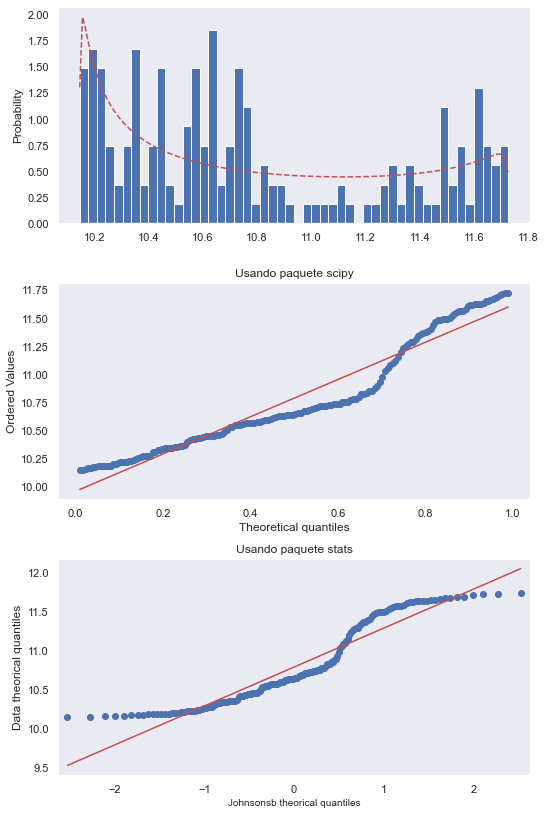

In [70]:
##2020
## johnsonsb 


measurements = v3_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,12))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'johnsonsb'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=10)
plt.ylabel('Data theorical quantiles')
plt.show()

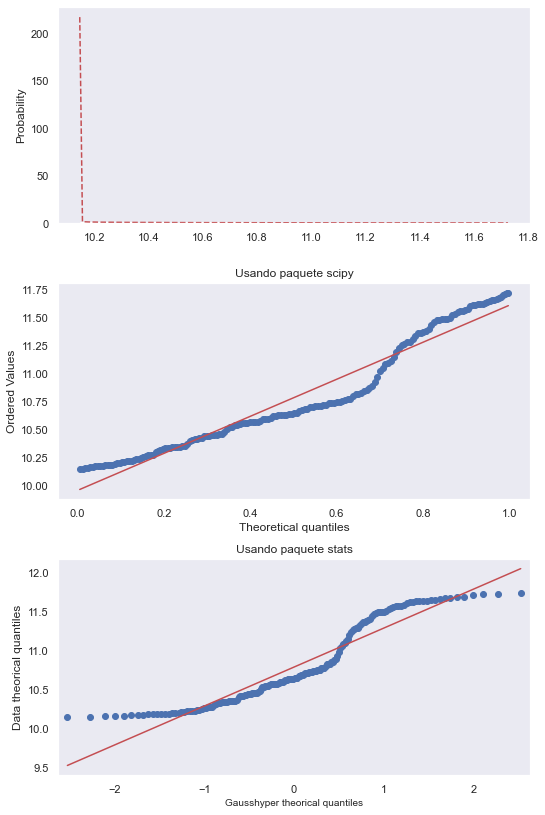

In [71]:
##2020
## gausshyper


measurements = v3_data
# Histograma de las variables creadas
divisiones = 30 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,12))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'gausshyper'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=10)
plt.ylabel('Data theorical quantiles')
plt.show()

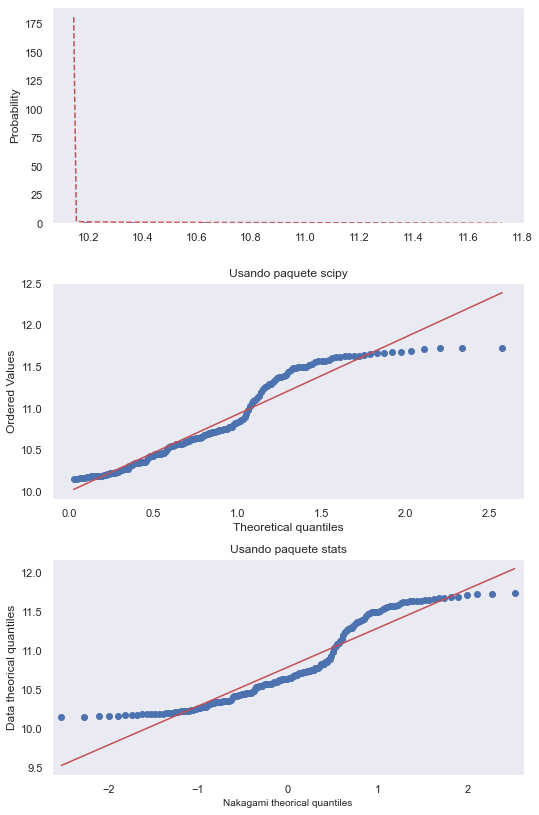

In [72]:
##2020
## nakagami


measurements = v3_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,12))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'nakagami'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=10)
plt.ylabel('Data theorical quantiles')
plt.show()

**Observamos que la distribución johnsonsb fue la que mejor se adaptó**

### 2020-2021

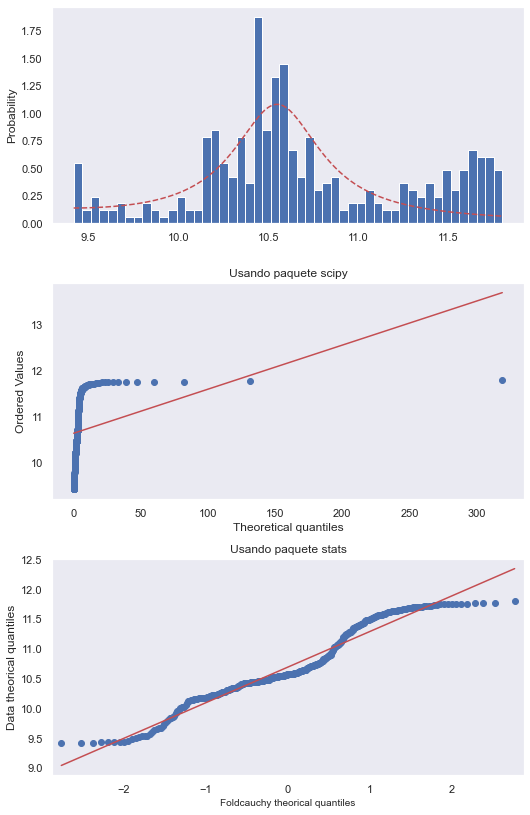

In [73]:
##2020-2021
##foldcauchy##


measurements = v4_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,12))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'foldcauchy'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=10)
plt.ylabel('Data theorical quantiles')
plt.show()

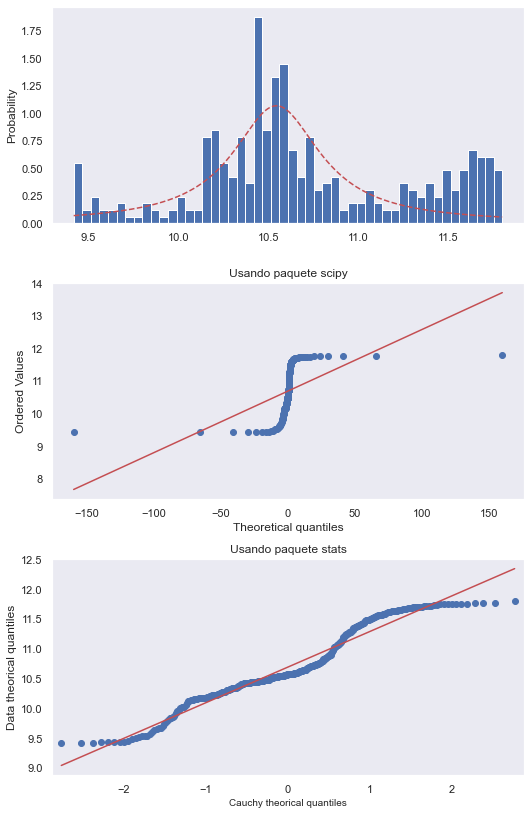

In [74]:
##2020-2021
##cauchy##


measurements = v4_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,12))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'cauchy'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=10)
plt.ylabel('Data theorical quantiles')
plt.show()

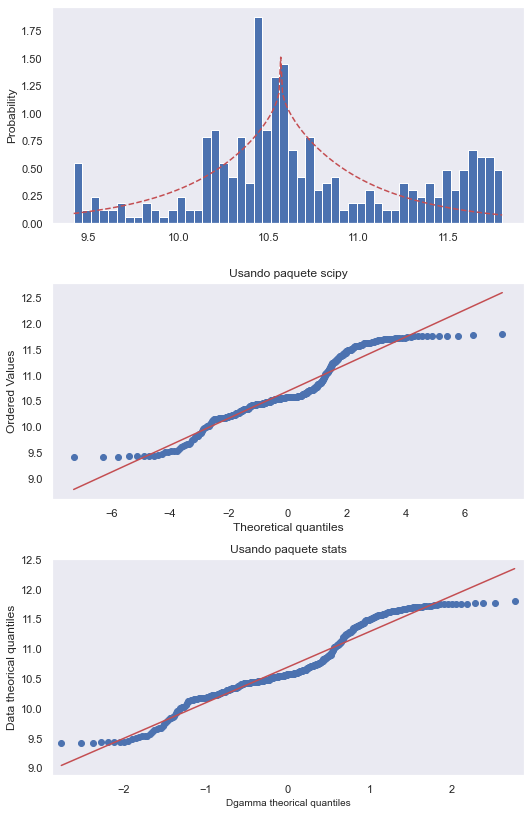

In [75]:
##2020-2021
##dgamma##


measurements = v4_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,12))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'dgamma'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=10)
plt.ylabel('Data theorical quantiles')
plt.show()

### Histogramas con chi cuadrada

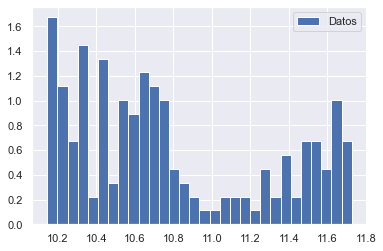

In [76]:
#2020
H1 = 30
y, x, _ = plt.hist(v3_data, bins = H1, density = True, label = 'Datos')
x = x[1:]
plt.legend(loc = 'best')

In [77]:
#2020
chi_cuadrada(best_h0[0],v3_data,x,y,H1,0.95)

Valor de chi cuadrado teorico  =  160.89341588887314
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=160.89341588887314, pvalue=3.175776645964694e-20)
Estadístico de chi_cuadrado =  37.65248413348277
La distribución analizada fue:  johnsonsb


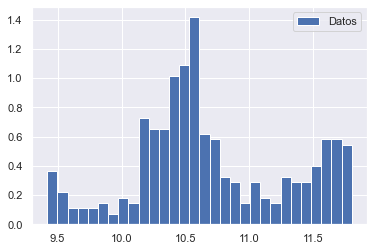

In [78]:
#2020-2021
H2 = 30
y, x, _ = plt.hist(v4_data, bins = H2, density = True, label = 'Datos')
x = x[1:]
plt.legend(loc = 'best')

In [79]:
#2020
chi_cuadrada(best_h01[4],v4_data,x,y,H2,0.95)

Valor de chi cuadrado teorico  =  89.78414537890656
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=89.78414537890656, pvalue=3.929590360856283e-08)
Estadístico de chi_cuadrado =  40.113272069413625
La distribución analizada fue:  cauchy


### KDE

In [80]:
#bandwith adecuado 2020
bd5 = get_bandwidth(v3_data, .1, 1, 30).pop('bandwidth')
bd5

0.1

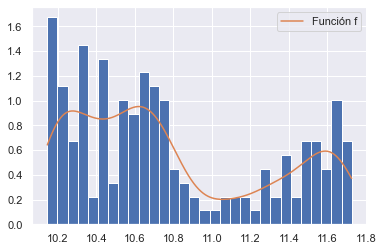

In [81]:
#2020
xha = np.linspace(np.amin(v3_data), np.amax(v3_data), 1000)
f3 = kde_hist_f_u(v3_data,bd5, H1, xha)

In [82]:
#bandwith adecuado 2020
bd6 = get_bandwidth(v4_data, .1, 1, 30).pop('bandwidth')
bd6

0.16206896551724137

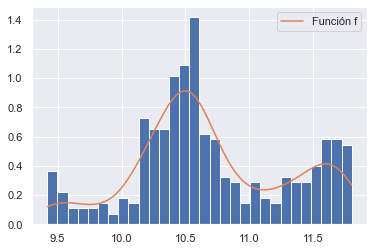

In [83]:
#2020-2021
xh = np.linspace(np.amin(v4_data), np.amax(v4_data), 1000)
f4 = kde_hist_f_u(v4_data,bd6, H2, xh)

### Aceptación y rechazo con reducción de varianza (igualmente espaciado)


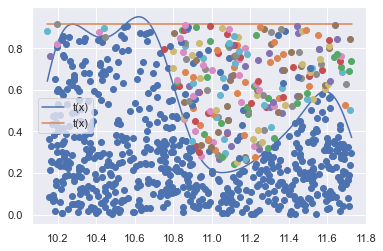

array([11.43023835, 11.20258362, 11.21783334, 11.05511948, 10.39700932,
       10.22243635, 10.84967403, 11.15589246, 10.46775736, 10.51746891,
       11.6641086 , 11.40997012, 11.48630262, 10.52599688, 11.10020014,
       10.63301449, 10.49674169, 10.38369616, 10.25504746, 10.65724725,
       11.17679509, 10.38976065, 10.67840491, 10.74768505, 10.91132693,
       10.93304181, 11.35420312, 11.68336299, 10.62909017, 10.97850058,
       10.6177466 , 10.2745061 , 11.4746557 , 11.32523031, 10.32348461,
       11.52225521, 10.48645795, 10.42659844, 10.52954705, 10.9935914 ,
       10.21267027, 11.59137005, 10.4997112 , 11.1949451 , 10.93203501,
       10.5356476 , 10.62164804, 10.44358891, 11.43222839, 11.33112711,
       10.18107551, 11.07551867, 11.6112464 , 11.50239339, 10.15336317,
       11.64583501, 11.09530379, 10.27369218, 10.73100332, 11.42859735,
       10.46196514, 10.76958468, 11.05734631, 10.77331522, 11.40016937,
       11.62240684, 11.59084519, 11.09853887, 10.9801423 , 11.20

In [84]:
##2020
v_a_hosp = generar_aleatorias_reducc_var(600,f3,10,xha,v3_data,estra_igualmente_espaciado,600)
v_a_hosp

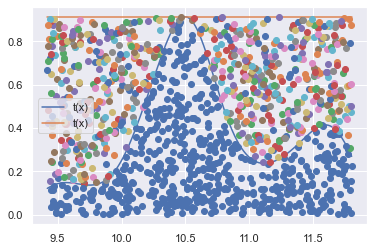

array([ 9.52775617, 10.00701525,  9.85790277, 11.79672632, 11.52564708,
        9.48934282,  9.80301033, 10.38450525, 11.31310605, 11.28308505,
       10.12124546, 11.49292071, 11.63268603,  9.56856162, 11.49465501,
       11.74768723, 11.09907208, 11.14114791, 10.35499869, 10.06222455,
       11.30431081, 11.24638584, 10.0325761 , 10.28226014, 10.55180599,
       10.40651865, 11.35342651, 10.15872071,  9.49322947, 10.43101083,
       10.72344042,  9.52660659, 11.09342068,  9.46381588, 10.39736436,
       10.30653626, 10.43074173, 10.00252579,  9.67393093, 10.53024873,
       11.56591981,  9.64097674, 11.64190693, 11.25076079, 10.46835628,
        9.7676141 , 11.13298377, 10.33287304, 10.31436061, 10.37213108,
        9.97040453, 11.23170854,  9.95567017, 10.0370363 , 11.51930025,
       10.5895515 , 10.92989364, 11.10469399, 10.21678748,  9.98283038,
        9.89293123,  9.97450477, 11.71109011, 10.41250109, 10.97995443,
        9.9166052 ,  9.77682305, 10.68603219, 10.93051638, 11.02

In [85]:
##2020-2021
v_a_hosp1 = generar_aleatorias_reducc_var(600,f4,10.5,xh,v4_data,estra_igualmente_espaciado,600)
v_a_hosp1

### Montecarlo

### Total vacunados

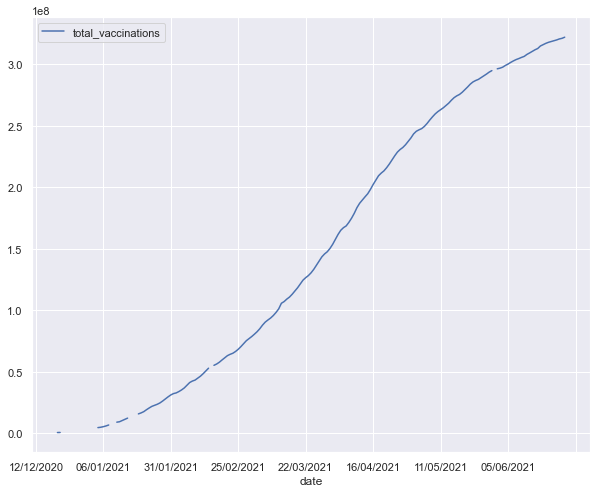

In [86]:
usa_vac = pd.DataFrame(data['total_vaccinations'])
usa_vac.plot(figsize=[10,8])

### Distribuciones de probabilidad

In [93]:
usav = usa_vac[usa_vac['total_vaccinations'] !=0].dropna()
v5_data = log_int(usav)

,sumsquare_error,aic,bic,kl_div
johnsonsb,0.408942,509.996521,-1032.627134,inf
beta,0.481715,565.986657,-1004.129529,inf
genextreme,0.806941,546.540065,-919.522366,inf
pearson3,0.813136,585.436173,-918.191554,inf
levy_l,0.814216,604.868269,-923.119762,inf


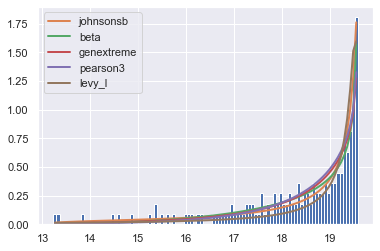

In [94]:
from fitter import Fitter
fitterv = Fitter(v5_data)
fitterv.fit()
fitterv.summary()

### **Ajuste de distribuciones**
###  **Q-Q**

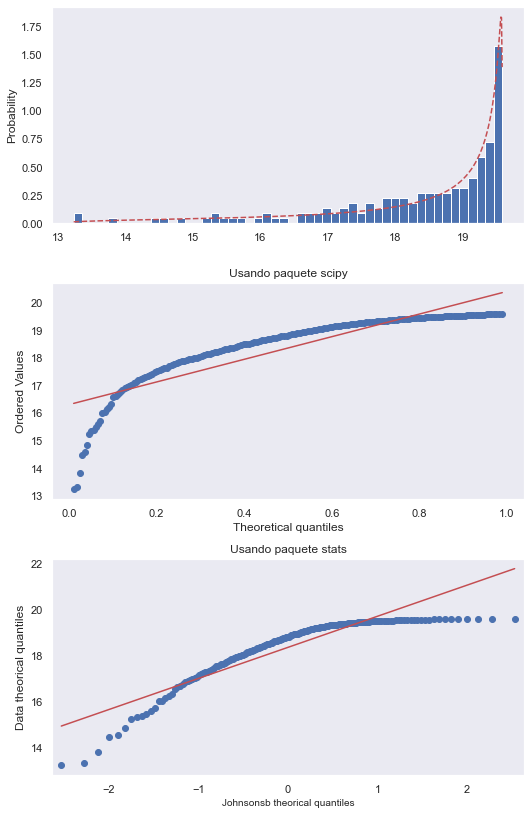

In [95]:
## johnsonsb 

measurements = v5_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,12))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'johnsonsb'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=10)
plt.ylabel('Data theorical quantiles')
plt.show()

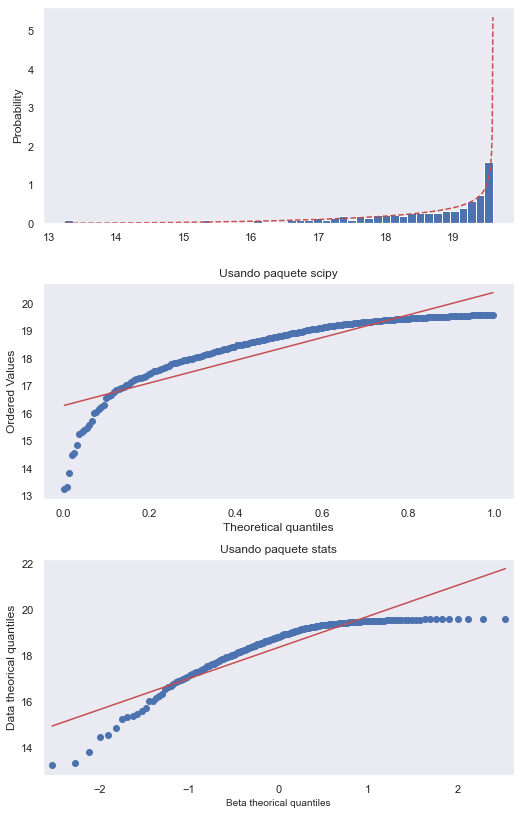

In [96]:
## beta 

measurements = v5_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,12))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'beta'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=10)
plt.ylabel('Data theorical quantiles')
plt.show()

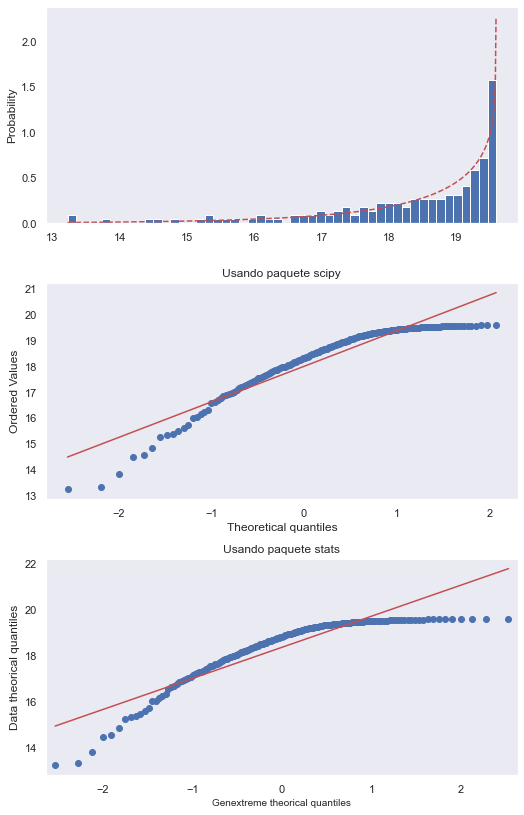

In [97]:
## genextreme 

measurements = v5_data
# Histograma de las variables creadas
divisiones = 50 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,12))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'genextreme'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements,line='s',ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=10)
plt.ylabel('Data theorical quantiles')
plt.show()

### Histograma con Chi cuadrada

Valor de chi cuadrado teorico  =  83.36499911295947
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=83.36499911295947, pvalue=3.6874806558447146e-07)
Estadístico de chi_cuadrado =  37.65248413348277
La distribución analizada fue:  johnsonsb


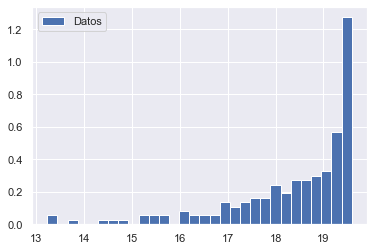

In [98]:
H1 = 30
y, x, _ = plt.hist(v5_data, bins = H1, density = True, label = 'Datos')
x = x[1:]
plt.legend(loc = 'best')
chi_cuadrada(best_h0[0],v5_data,x,y,H1,0.95)

### KDE

In [99]:
bd7 = get_bandwidth(v5_data, .1, 1, 30).pop('bandwidth')
bd7

0.4724137931034482

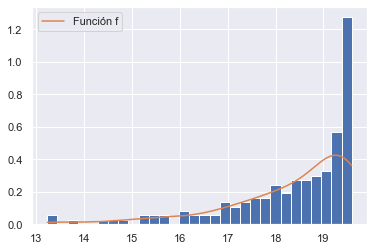

In [100]:
xva = np.linspace(np.amin(v5_data), np.amax(v5_data), 1000)
f5 = kde_hist_f_u(v5_data,bd7, H1, xva)

### Aceptación y rechazo con reducción de varianza (igualmente espaciado)

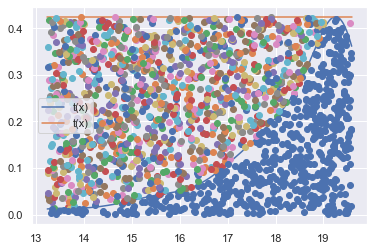

array([14.65185498, 15.76881016, 15.0882241 , 14.99941307, 17.05319776,
       16.61707175, 13.82046119, 19.32511409, 16.69849802, 14.89165201,
       14.02025042, 14.39806758, 15.91193638, 15.99720496, 14.75830004,
       16.03593295, 17.69104861, 16.5608098 , 19.20998128, 15.645265  ,
       15.77603007, 15.78934807, 19.08869312, 16.33030061, 15.59276015,
       16.25343518, 18.76347003, 18.36827973, 17.17046588, 18.21515549,
       19.17204299, 17.82792773, 19.42762841, 18.01481265, 15.3965646 ,
       17.26528027, 14.90742106, 18.0473004 , 16.71862625, 19.18917174,
       17.25783556, 15.44058668, 17.94680784, 16.59176294, 16.55149843,
       16.92573989, 15.74909292, 18.98901913, 15.79290929, 18.7953694 ,
       16.9901637 , 19.18802566, 18.74190984, 16.13107738, 19.34679468,
       17.57906482, 16.04702654, 15.95352554, 17.95572168, 16.06418276,
       17.15061367, 17.95819738, 18.39771927, 18.60473278, 18.655617  ,
       18.95855801, 17.01209891, 18.14863309, 18.32650632, 17.65

In [102]:
v_a_vac = generar_aleatorias_reducc_var(600,f5,20,xva,v5_data,estra_igualmente_espaciado,600)
v_a_vac

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>